In [56]:

# this is the Kmeanclass

import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    
    
    def initializ_centroids(self, dataset_df):
        
        np.random.RandomState(self.random_state)
        
        random_idx = np.random.permutation(dataset_df.shape[0])
      
        centroids = dataset_df[random_idx[:self.n_clusters]]
        
        return centroids

    def compute_centroids(self, dataset_df, labels):
        
        centroids = np.zeros((self.n_clusters, dataset_df.shape[1]))
        
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(dataset_df[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, dataset_df, centroids):
       
        distance = np.zeros((dataset_df.shape[0], self.n_clusters))
       
        for k in range(self.n_clusters):
            
            row_norm = norm(dataset_df - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        
        return np.argmin(distance, axis=1)
    
    def compute_sse(self, dataset_df, labels, centroids):
        distance = np.zeros(dataset_df.shape[0])
        
        for k in range(self.n_clusters):
            distance[labels == k] = norm(dataset_df[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, dataset_df):
        
        self.centroids = self.initializ_centroids(dataset_df)
        
        for i in range(self.max_iter):
            old_centroids = self.centroids
            
            distance = self.compute_distance(dataset_df, old_centroids)
            
            self.labels = self.find_closest_cluster(distance)
            
            self.centroids = self.compute_centroids(dataset_df, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(dataset_df, self.labels, self.centroids)
    # predict does seem to be called by any: commented, code work the same
    def predict(self, dataset_df):
        distance = self.compute_distance(dataset_df, self.centroids)
        return self.find_closest_cluster(distance)



In [57]:
import pandas as pd

df = pd.read_csv('mall_customers.xls')

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
# This copy only the income and Spending of the dataset

incomeSpending_df = df.iloc[:, 3:]

incomeSpending_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


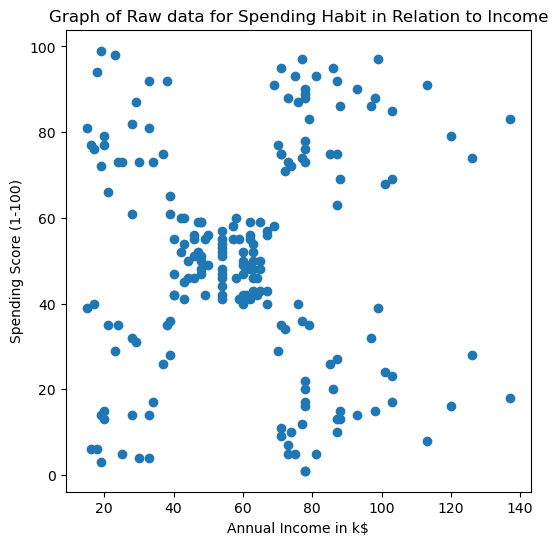

In [60]:
# Plot the data for eruptions
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
# x dataframe has 2 columns 0 and 1
plt.scatter(x.iloc[:, 0], x.iloc[:, 1])
plt.xlabel('Annual Income in k$')
plt.ylabel('Spending Score (1-100)')
plt.title('Graph of Raw data for Spending Habit in Relation to Income');


In [61]:
# Standadize data with StandardScaler from sklearn

from sklearn.preprocessing import StandardScaler

data_standard_deviation = StandardScaler().fit_transform(x)

km = Kmeans(n_clusters=5, max_iter=100)

km.fit(data_standard_deviation)

centroids = km.centroids

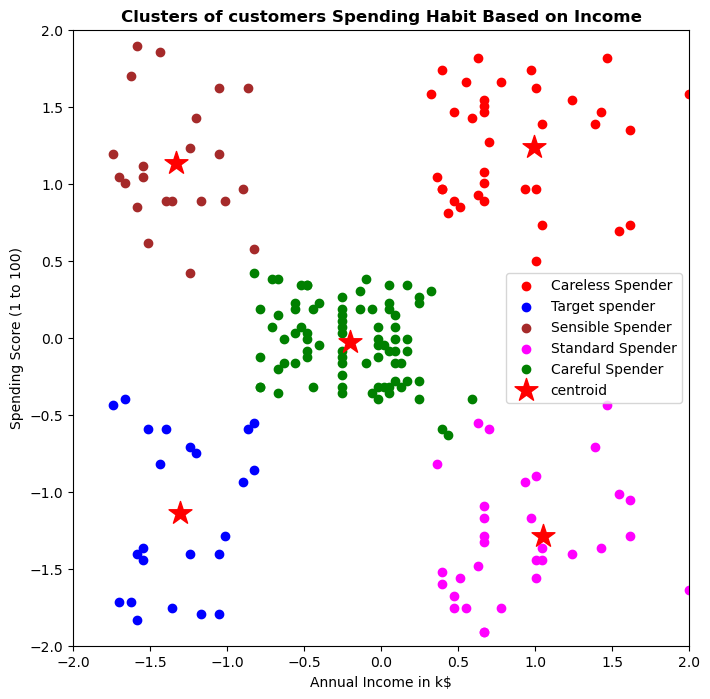

In [62]:
# Plot the data after randomized centriods are found: For more clusters, you have to add them to the plot

fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(data_standard_deviation[km.labels == 0, 0], data_standard_deviation[km.labels == 0, 1],   #cluster number 1  (if it equals to)
            c='red', label='Careless Spender')
plt.scatter(data_standard_deviation[km.labels == 1, 0], data_standard_deviation[km.labels == 1, 1],   #cluster number 2
            c='blue', label='Target spender')
plt.scatter(data_standard_deviation[km.labels == 2, 0], data_standard_deviation[km.labels == 2, 1],   #cluster number 3
            c='brown', label='Sensible Spender') # legends
plt.scatter(data_standard_deviation[km.labels == 3, 0], data_standard_deviation[km.labels == 3, 1],   #cluster number 4
            c='magenta', label='Standard Spender') 
plt.scatter(data_standard_deviation[km.labels == 4, 0], data_standard_deviation[km.labels == 4, 1],   #cluster number 5
            c='green', label='Careful Spender') 


plt.scatter(centroids[:, 0], centroids[:, 1],  marker='*', s=300, # 0 and represent axis 0 (x) and axis 1 (y)
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2,2])
plt.xlabel('Annual Income in k$')
plt.ylabel('Spending Score (1 to 100)')
plt.title('Clusters of customers Spending Habit Based on Income', fontweight='bold')
ax.set_aspect('equal');

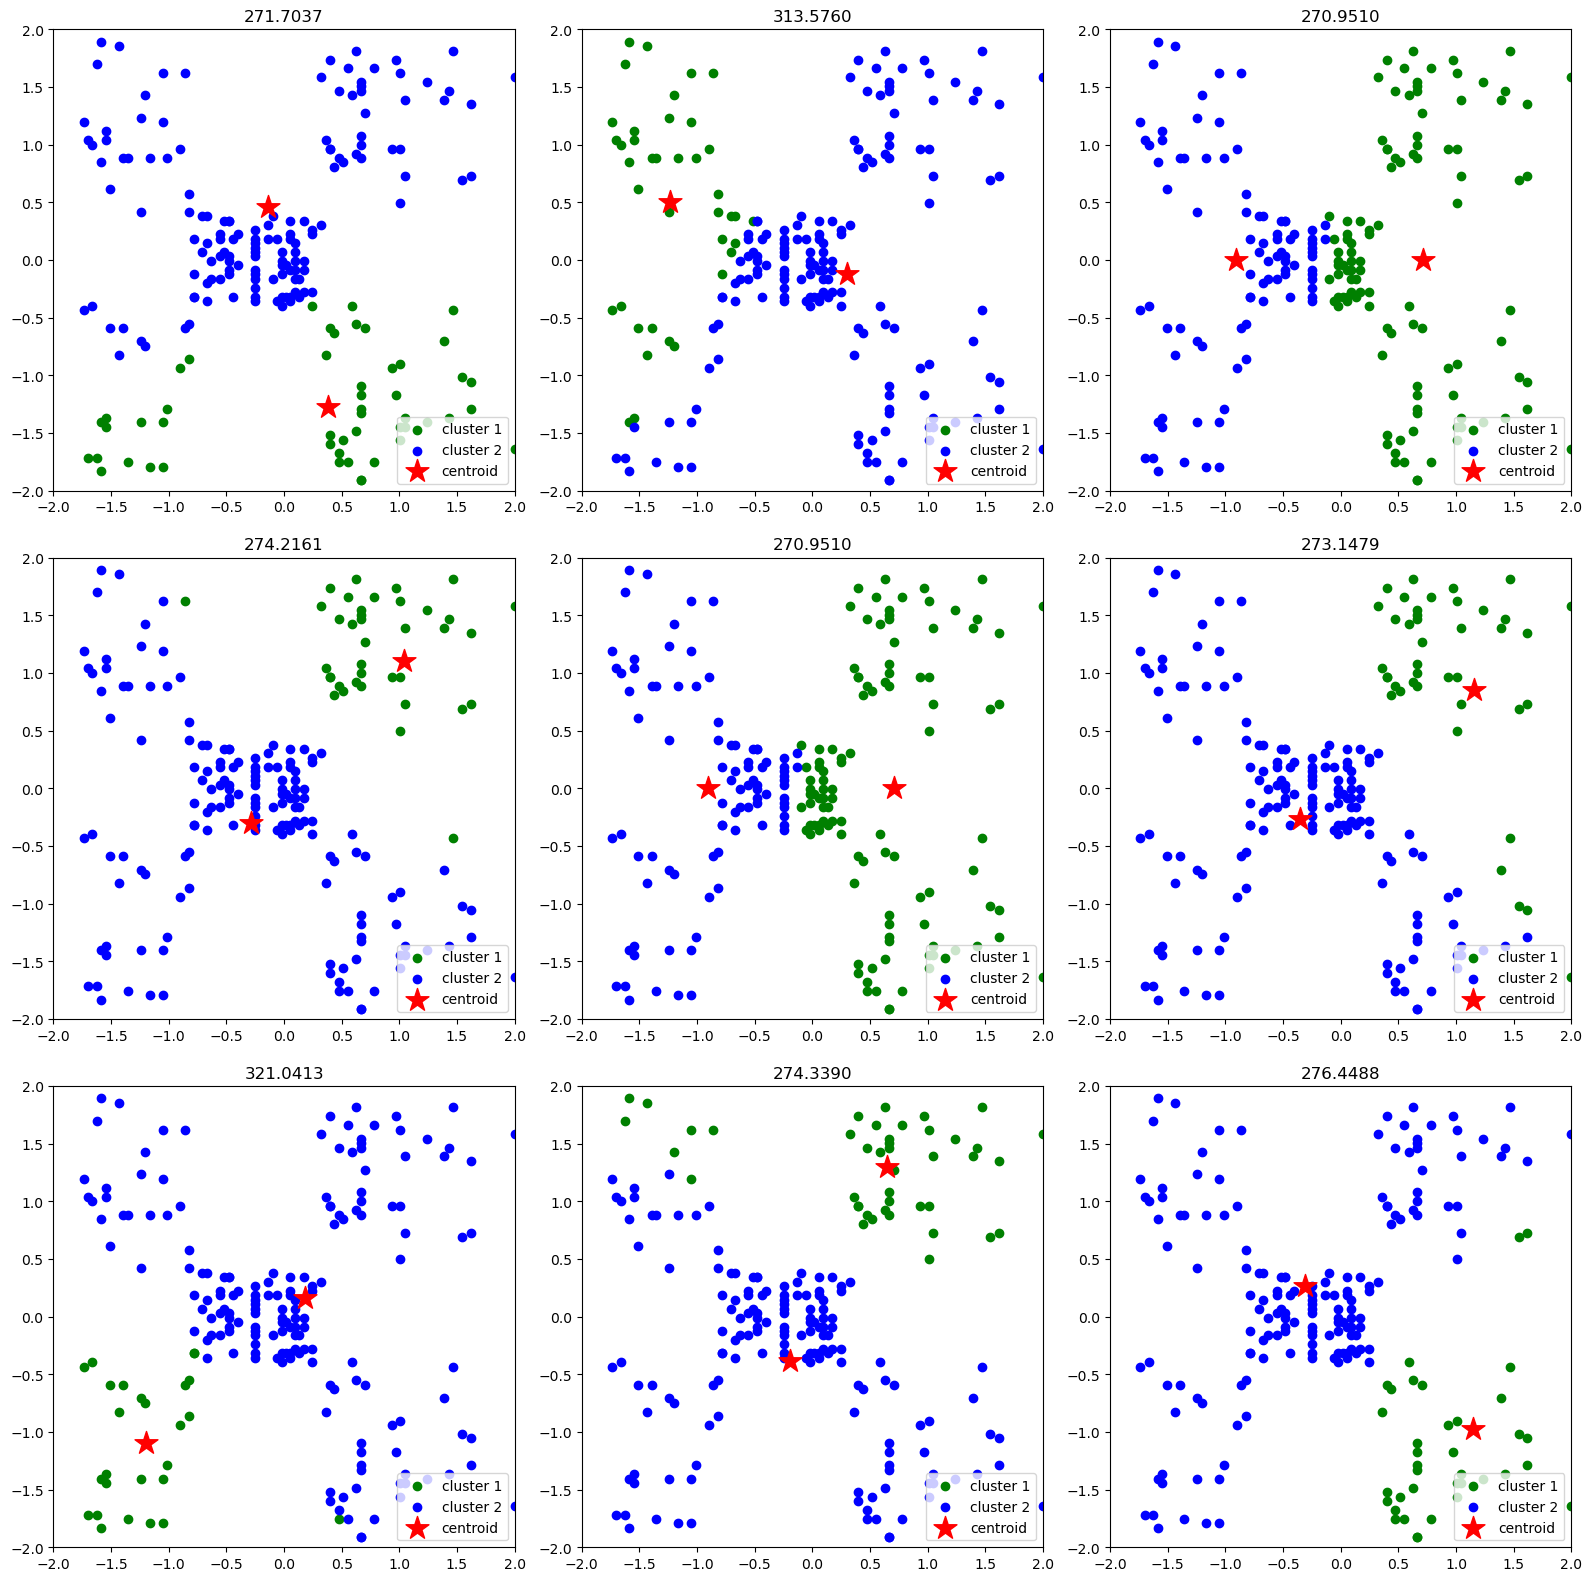

In [63]:
# try 9 different randomized centroids and plot them and see the difference

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)

centers = []
for i in range(n_iter):
    km = Kmeans(n_clusters=2,
                max_iter=3,
                random_state=np.random.randint(0, 1000, size=1))

    km.fit(data_standard_deviation)
    centroids = km.centroids

    centers.append(centroids)
   
    ax[i].scatter(data_standard_deviation[km.labels == 0, 0], data_standard_deviation[km.labels == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(data_standard_deviation[km.labels == 1, 0], data_standard_deviation[km.labels == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();